# Défi IA 2023 : Analyse exploratoire 

## Packages nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt, log
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LassoCV, LassoLarsCV
#from itertools import cycle
#from sklearn.linear_model import lasso_path
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import roc_curve
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler  
#from sklearn.svm import SVC, SVR
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.tree import export_graphviz
#from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import cv
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier as RF
#from sklearn import cross_validation as CV
from sklearn.model_selection import train_test_split
from time import ctime
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import accuracy_score as accuracy

import pandas as pd
from category_encoders import TargetEncoder

## Chargement des données

In [200]:
data_train=pd.read_csv('./Datatrain/data_train_final.csv')
data=data_train.drop(['Unnamed: 0'],axis=1)

In [201]:
# Vérification du contenu
data.head()

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0
1,1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0
2,2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0
3,3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0
4,4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0


In [202]:
data_test= pd.read_csv('test_set.csv')
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


## Etude des jeux de données test et train

In [203]:
data.describe()

,index,hotel_id,price,stock,date,mobile,avatar_id,index_request,parking,pool,children_policy
count,351753.000000,351753.000000,351753.000000,351753.000000,351753.000000,351753.000000,351753.000000,291548.000000,351753.000000,351753.000000,351753.000000
mean,125882.832004,499.046376,158.407397,41.366595,20.026268,0.512502,105926.107317,0.000978,0.437708,0.169846,0.064352
std,88382.991078,288.278943,81.155013,54.107314,13.590503,0.499844,66738.370734,0.047893,0.496105,0.375498,0.299666
min,0.000000,0.000000,38.000000,0.000000,1.000000,0.000000,6217.000000,0.000000,0.000000,0.000000,0.000000
25%,43969.000000,248.000000,97.000000,4.000000,8.000000,0.000000,34429.000000,0.000000,0.000000,0.000000,0.000000
50%,115530.000000,502.000000,141.000000,16.000000,16.000000,1.000000,95250.000000,0.000000,0.000000,0.000000,0.000000
75%,203468.000000,748.000000,195.000000,64.000000,35.000000,1.000000,146462.000000,0.000000,1.000000,0.000000,0.000000
max,291406.000000,998.000000,547.000000,284.000000,44.000000,1.000000,334155.000000,3.000000,1.000000,1.000000,2.000000


In [9]:
data_test.describe()

,index,order_requests,date,mobile,avatar_id,hotel_id,stock
count,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000,6644.000000
mean,3321.500000,419.312763,15.201084,0.453642,381.219597,472.193709,23.766105
std,1918.101926,246.445963,13.783346,0.497884,243.526271,280.681105,32.582240
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1660.750000,202.000000,3.000000,0.000000,171.000000,252.000000,2.000000
50%,3321.500000,415.500000,15.000000,0.000000,381.000000,449.000000,8.000000
75%,4982.250000,636.000000,21.000000,1.000000,589.250000,702.000000,33.000000
max,6643.000000,844.000000,40.000000,1.000000,794.000000,995.000000,199.000000


Text(0.5, 1.0, 'Distribution of date data_test')

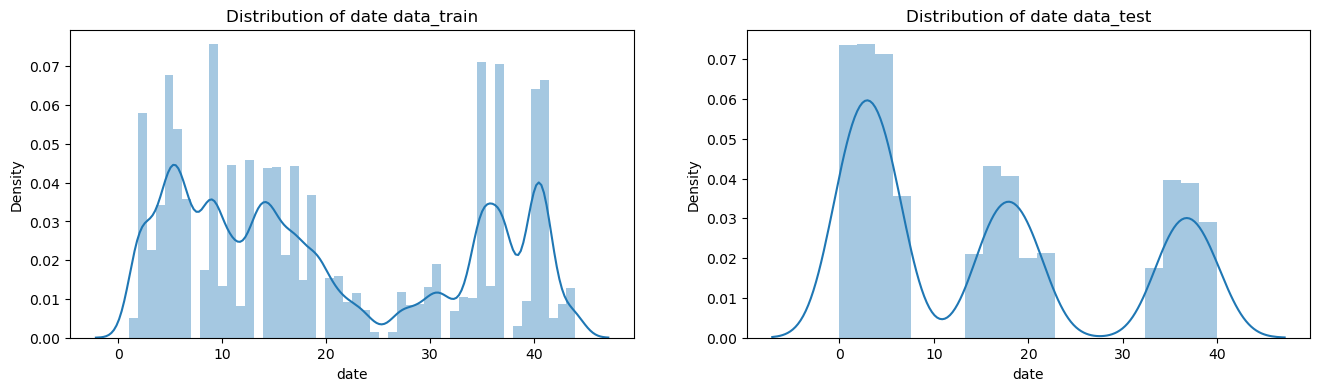

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data['date'], ax=ax1)
ax1.set_title('Distribution of date data_train')


sns.distplot(data_test['date'], ax=ax2)
ax2.set_title('Distribution of date data_test')

Text(0.5, 1.0, 'Distribution of city data_test')

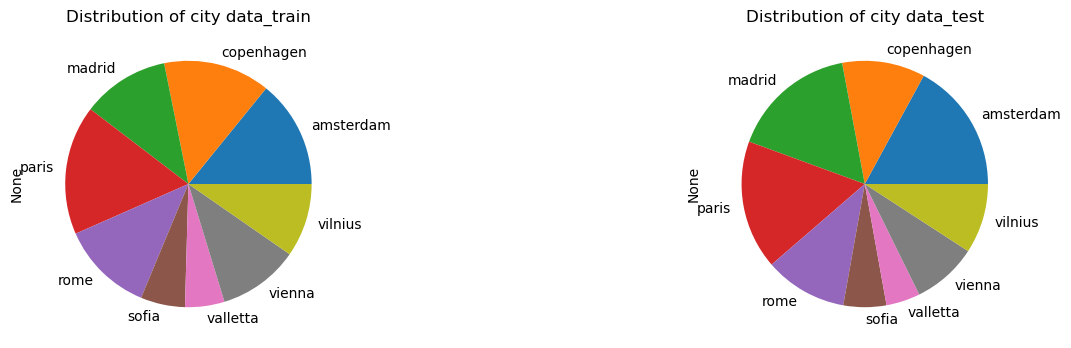

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
data.groupby('city').size().plot(kind='pie',ax=ax1)
ax1.set_title('Distribution of city data_train')


data_test.groupby('city').size().plot(kind='pie',ax=ax2)
ax2.set_title('Distribution of city data_test')

Text(0.5, 1.0, 'Distribution of language data_test')

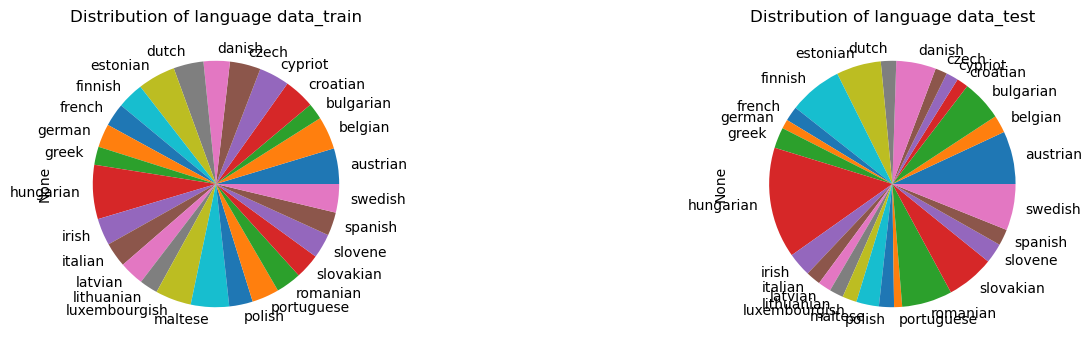

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
data.groupby('language').size().plot(kind='pie',ax=ax1)
ax1.set_title('Distribution of language data_train')


data_test.groupby('language').size().plot(kind='pie',ax=ax2)
ax2.set_title('Distribution of language data_test')

Text(0.5, 1.0, 'Distribution of mobile data_test')

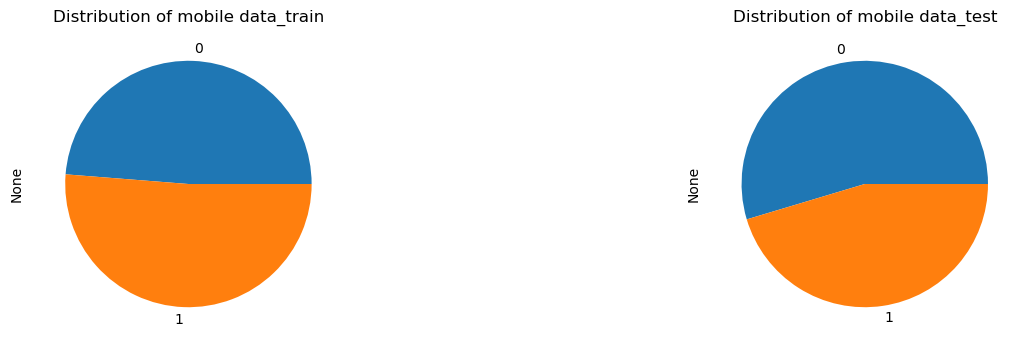

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
data.groupby('mobile').size().plot(kind='pie',ax=ax1)
ax1.set_title('Distribution of mobile data_train')


data_test.groupby('mobile').size().plot(kind='pie',ax=ax2)
ax2.set_title('Distribution of mobile data_test')

### Distribution de la variable à prédire 'price'

Text(0.5, 1.0, 'Distribution of price after log transform')

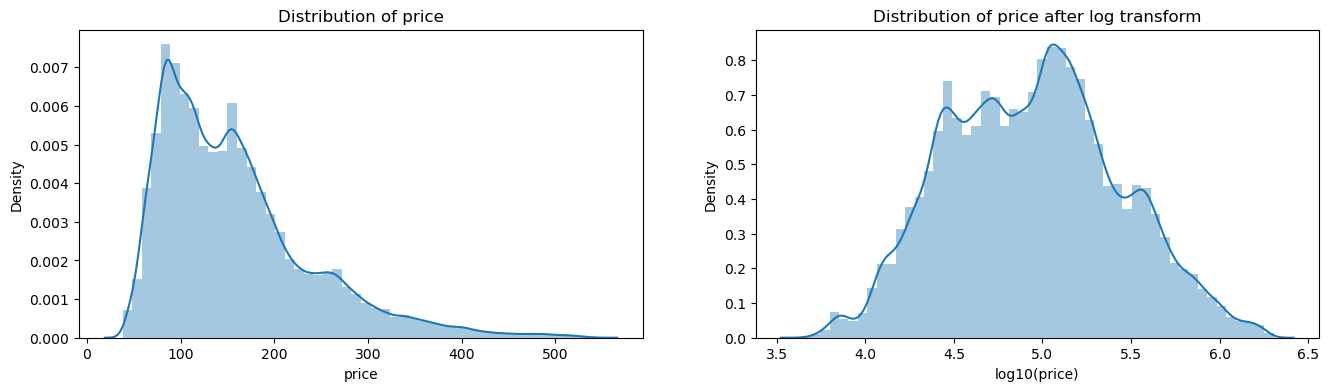

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["price"], ax=ax1)
ax1.set_title('Distribution of price')

data["log_price"]=data["price"].map(lambda x : log(x))
sns.distplot(data["log_price"].rename('log10(price)'), ax=ax2)
ax2.set_title('Distribution of price after log transform')

### Distribution des variables quantitatives du data_train

Text(0.5, 1.0, 'Distribution of date')

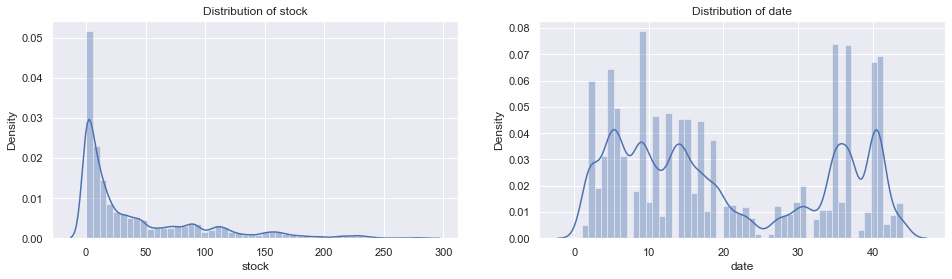

In [22]:
numerical=['stock','date']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))
sns.distplot(data["stock"], ax=ax1)
ax1.set_title('Distribution of stock')


## Date peut être pas pertinent ? 
sns.distplot(data["date"], ax=ax2)
ax2.set_title('Distribution of date')

In [23]:
data[numerical].corr()

,stock,date
stock,1.000000,0.799486
date,0.799486,1.000000


### Distribution variables qualitatives du data_train

In [15]:
list_parking=data["parking"].tolist()
list_parking2=[list_parking.count(0),list_parking.count(1)]

list_pool=data["pool"].tolist()
list_pool2=[list_pool.count(0),list_pool.count(1)]

list_children=data["children_policy"].tolist()
list_children2=[list_children.count(0),list_children.count(1),list_children.count(2)]

list_mobile=data["mobile"].tolist()
list_mobile2=[list_mobile.count(0),list_mobile.count(1)]


Text(0.5, 1.0, 'mobile')

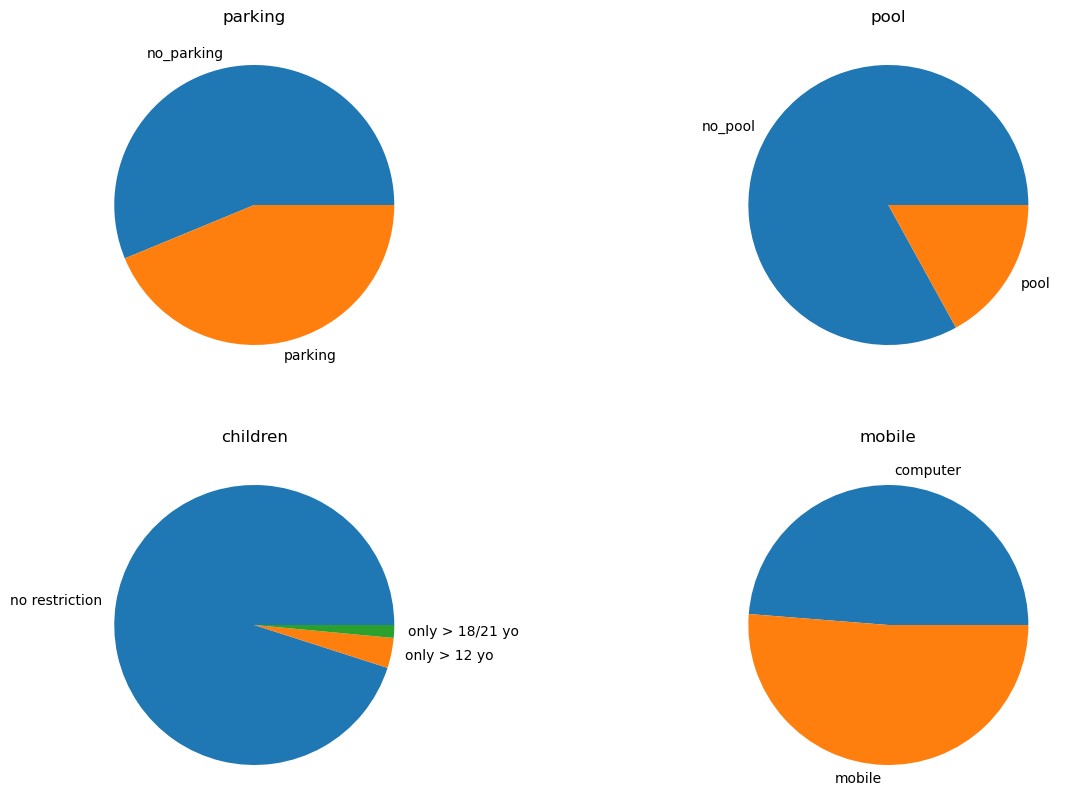

In [16]:
fig, axis = plt.subplots(2,2,figsize=(15,10))
axis[0,0].pie(list_parking2, labels = ['no_parking','parking'])
axis[0,0].set_title('parking')

axis[0,1].pie(list_pool2, labels = ['no_pool','pool'])
axis[0,1].set_title('pool')

axis[1,0].pie(list_children2, labels = ['no restriction','only > 12 yo','only > 18/21 yo' ])
axis[1,0].set_title('children')

axis[1,1].pie(list_mobile2, labels = ['computer','mobile'])
axis[1,1].set_title('mobile')

### Distribution du prix par rapport aux variables qualitatives du data_train

#### Distribution de price par rapport à parking

[Text(0.5, 0, '')]

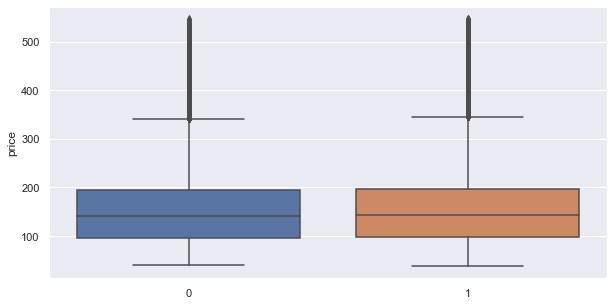

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["parking"], y=data["price"]).set(xlabel=None)

#### Distribution de price par rapport à pool

[Text(0.5, 0, '')]

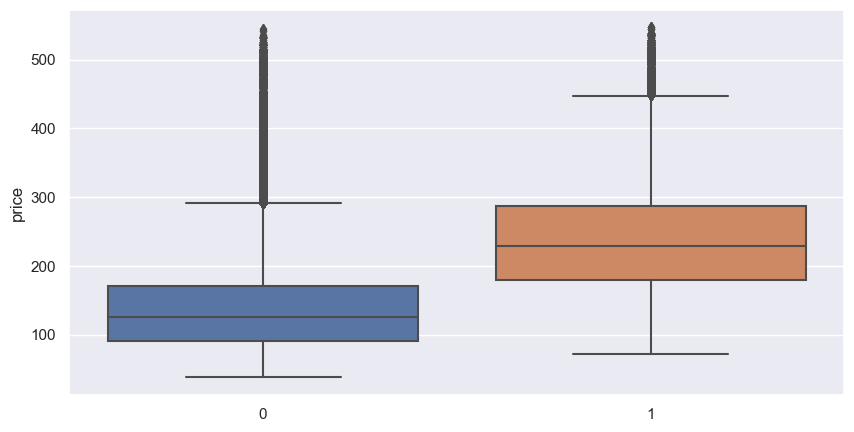

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["pool"], y=data["price"]).set(xlabel=None)

#### Distribution de price par rapport à children_policy

[Text(0.5, 0, '')]

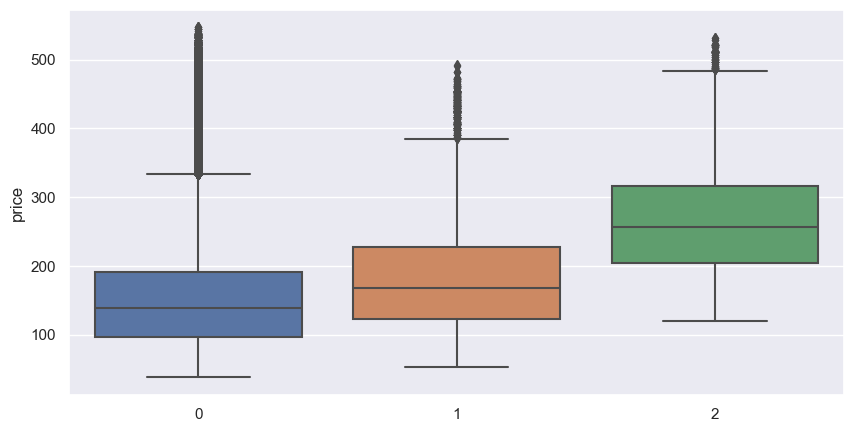

In [18]:
# Est-ce que l’hôtel a des restrictions concernant les enfants. 2 si l’hôtel interdit les enfants de moins de 18 ou 21 ans, 
# 1 si l’hôtel interdit les enfants de moins de 12 ans, 0 s’il autorise les enfants sans restrictions.

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["children_policy"], y=data["price"]).set(xlabel=None)

#### Distribution de price par rapport à parking

[Text(0.5, 0, '')]

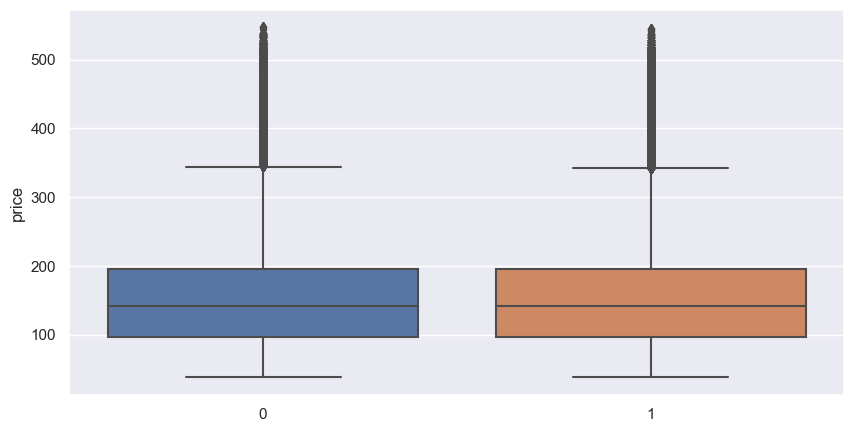

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=data["mobile"], y=data["price"]).set(xlabel=None)

## Interpretabilité

In [22]:
price=data['price']
X_train, X_test, Y_train, Y_test = train_test_split(data,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'],axis=1)
X_test=X_test.drop(['price'],axis=1)

In [23]:
feature_names = X_train.columns

In [22]:
lr = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)


rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(max_depth=10),
)


mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)

lr.fit(X_train, Y_train)
print(f"Linear regression score: {lr.score(X_test, Y_test):.2f}")
rf.fit(X_train, Y_train)
print(f"Random forest score: {rf.score(X_test, Y_test):.2f}")
mlp.fit(X_train, Y_train)
print(f"MLP score: {mlp.score(X_test, Y_test):.2f}")

Linear regression score: 0.88
Random forest score: 0.89
MLP score: 0.99


In [111]:
for c, feature_name in zip(lr[1].coef_, feature_names):
    print(feature_name, c)

hotel_id 1.0740731784816895
stock -28.01826536345589
date 2.2910062422685202
mobile 0.07104192357687822
parking -0.3406091803720699
pool 2.524614061306238
children_policy 0.9050636763205495
city_amsterdam 21597932387214.098
city_copenhagen 22323161776533.59
city_madrid 20293432417062.977
city_paris 23586547656904.43
city_rome 21294238406388.105
city_sofia 14565713764614.08
city_valletta 13557136934036.367
city_vienna 19488304756546.418
city_vilnius 18472950730668.14
language_austrian 7058858341160.146
language_belgian 7313832069908.609
language_bulgarian 4512072961366.269
language_croatian 7103755603718.818
language_cypriot 7027647680722.443
language_czech 7301847966628.681
language_danish 6592686939914.704
language_dutch 7061004433483.869
language_estonian 7038070489104.74
language_finnish 5987032910769.094
language_french 5959017686539.653
language_german 6004029736122.842
language_greek 5652735851320.707
language_hungarian 6083041535709.51
language_irish 6534777422136.255
language_i

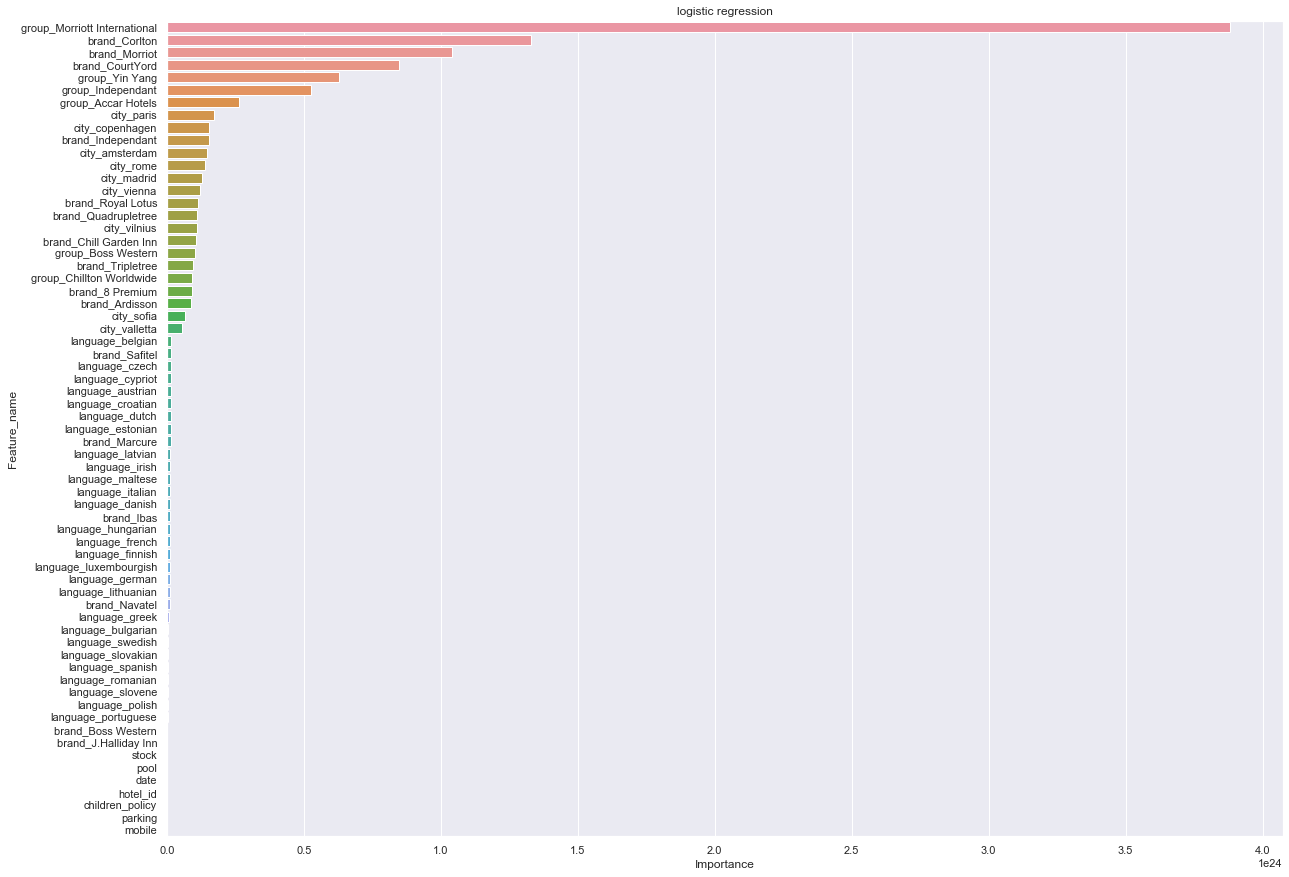

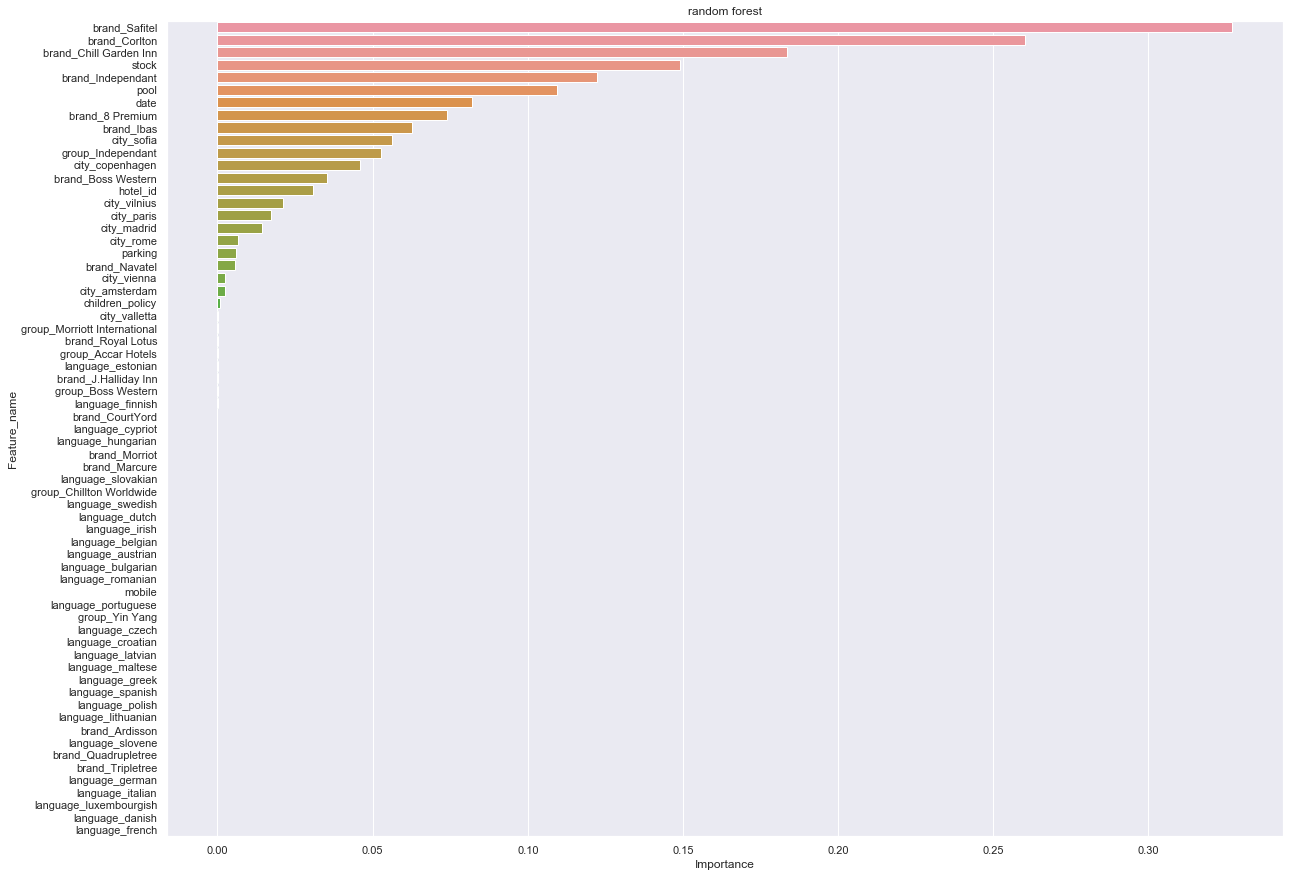

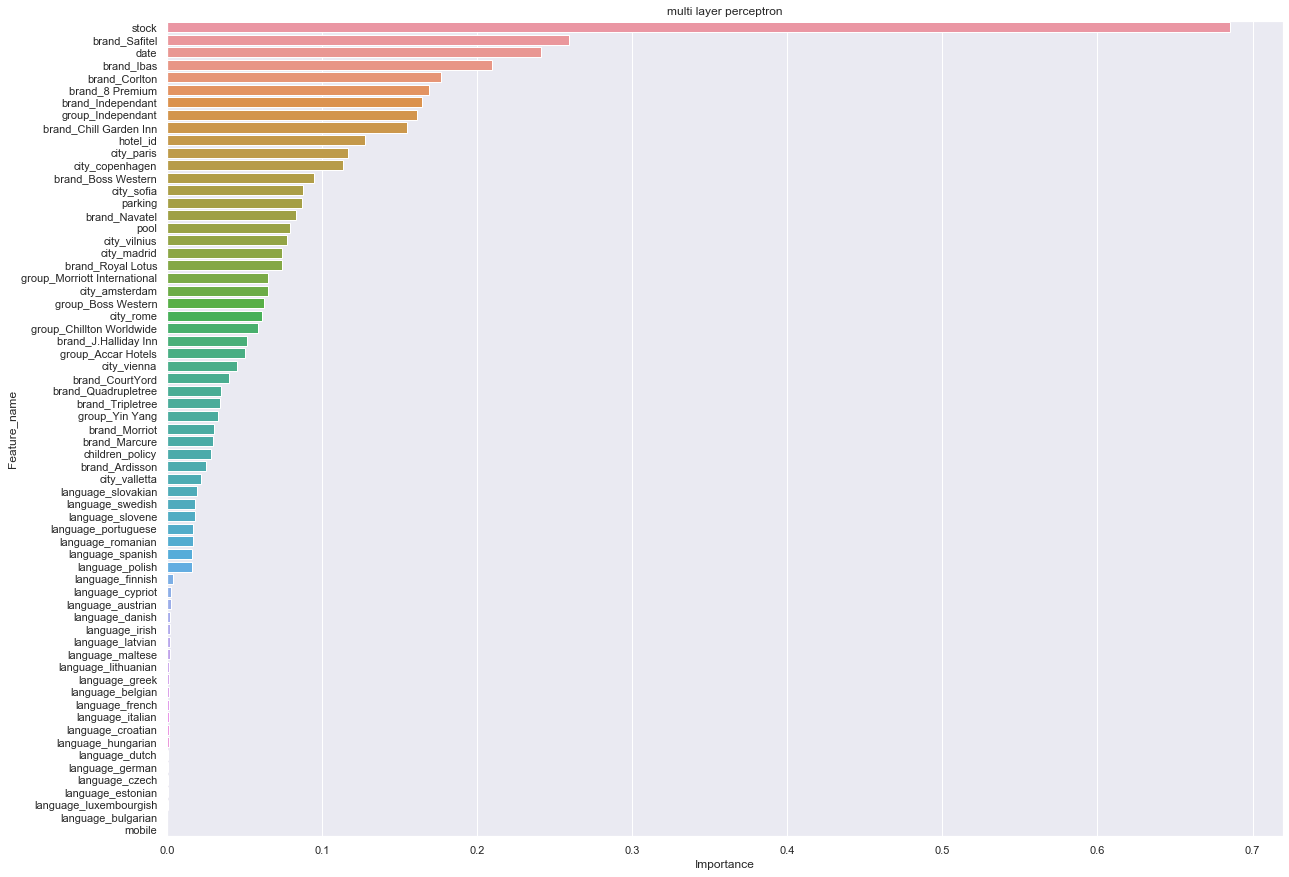

In [112]:
features_importance_dict = {}
for model, name in zip([lr, rf, mlp], ['logistic regression', 'random forest', 'multi layer perceptron']):
  plt.figure(figsize=(20,15))
  permumtation_impor = PermutationImportance(model, random_state=0).fit(X_test, Y_test)
  features_importance = {'Feature_name':feature_names, 'Importance':permumtation_impor.feature_importances_}  
  features_importance = pd.DataFrame(features_importance) 
  features_importance = features_importance.sort_values(['Importance'], ascending=False) 
  features_importance_dict[name] = features_importance
  ax = sns.barplot(x="Importance", y="Feature_name", data=features_importance)
  plt.title(name)

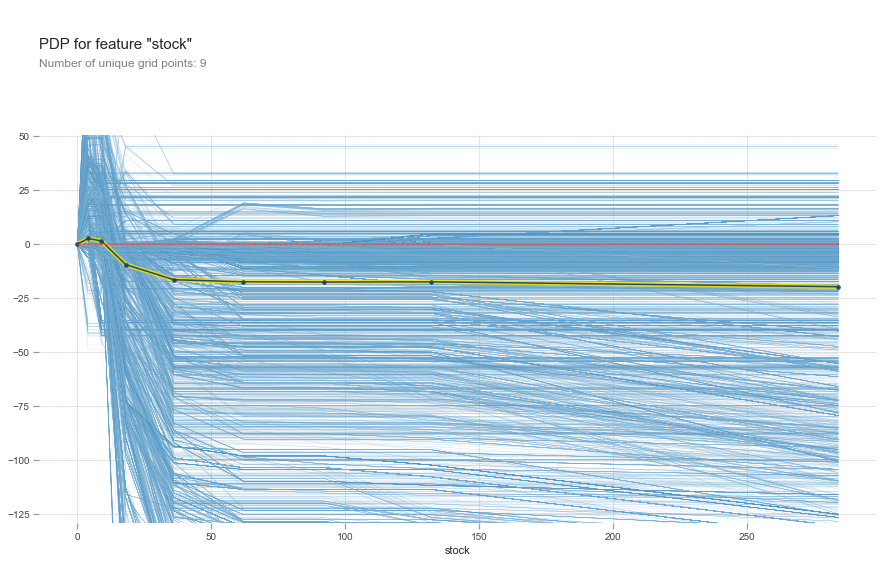

In [116]:
from pdpbox import pdp, get_dataset, info_plots

pdp_feat = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=feature_names, feature='stock')

pdp.pdp_plot(pdp_feat, 'stock', plot_lines=True, frac_to_plot=0.5)
plt.show()

## Validation adversariale 

In [154]:
data_train=pd.read_csv('./Datatrain/data_train_final.csv')
data_train=data_train.drop(['Unnamed: 0'],axis=1)

In [155]:
data_train

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy
0,0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0
1,1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0
2,2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0
3,3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0
4,4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351748,291402,620,170,12,vilnius,15,swedish,1,146515,0.0,Chillton Worldwide,Quadrupletree,0,1,0
351749,291403,605,182,15,vilnius,15,swedish,1,146515,0.0,Yin Yang,Royal Lotus,1,0,0
351750,291404,516,264,23,vilnius,15,swedish,1,146515,0.0,Morriott International,Corlton,1,0,2
351751,291405,490,144,13,vilnius,15,swedish,1,146515,0.0,Yin Yang,Ardisson,1,0,0


In [156]:
data_train["log_price"]=data_train["price"].map(lambda x : log(x))
data_train.head()

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0,5.003946
1,1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0,5.068904
2,2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0,4.219508
3,3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0,4.867534


In [157]:
list_avatar_train=data_train['avatar_id'].unique()

In [158]:
data_train['index_request']=0

In [159]:
for avatar in list_avatar_train : 
    test1=data_train[data_train['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_train[data_train['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_train[data_train['avatar_id']==avatar]=test1

In [160]:
data_test= pd.read_csv('test_set.csv')
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [161]:
list_avatar_test=data_test['avatar_id'].unique()

In [162]:
data_test['index_request']=0

In [163]:
for avatar in list_avatar_test : 
    test1=data_test[data_test['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_test[data_test['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_test[data_test['avatar_id']==avatar]=test1

In [164]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,1,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,1,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,1,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,1,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,1,Accar Hotels,Safitel,1,1,1


In [165]:
# this function is by Max Halford at the address noted above
def calc_smooth_mean(df, by, on, m, target_df):
    '''Function returns a weighted mean value for the each member of a column.
    Arguments:
    df: The df being used to calculate the means
    by: the column being target encoded
    on: the thing to be encoded; almost always price in this circumstance
    m: weight before moving toward global mean; usually a min # samples
    target_df: the target df for the mean encoding. Could be same as df or different.'''
    # Compute the global mean
    mean = df[on].mean() 

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])  
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return target_df[by].map(smooth)
    #return round(target_df[by].map(smooth), 0) 

In [166]:
# get size of training data
num_of_samples = data_train.shape[0]

# determining minimum number of samples for zip and month to use their
# own mean rather than expanding into the full data set mean 
city_samples = num_of_samples/data_train['city'].unique().shape[0]
group_samples = num_of_samples/data_train['group'].unique().shape[0]
brand_samples = num_of_samples/data_train['brand'].unique().shape[0]
language_samples = num_of_samples/data_train['language'].unique().shape[0]

In [167]:
data_test['city'] = calc_smooth_mean(data_train, by='city', on='price', m=city_samples,target_df=data_test)
data_test['group'] = calc_smooth_mean(data_train, by='group', on='price', m=group_samples,target_df=data_test)
data_test['brand'] = calc_smooth_mean(data_train, by='brand', on='price', m=brand_samples,target_df=data_test)
data_test['language'] = calc_smooth_mean(data_train, by='language', on='price', m=language_samples,target_df=data_test)

In [168]:
data_train['city'] = calc_smooth_mean(data_train, by='city', on='price', m=city_samples,target_df=data_train)
data_train['group'] = calc_smooth_mean(data_train, by='group', on='price', m=group_samples,target_df=data_train)
data_train['brand'] = calc_smooth_mean(data_train, by='brand', on='price', m=brand_samples,target_df=data_train)
data_train['language'] = calc_smooth_mean(data_train, by='language', on='price', m=language_samples,target_df=data_train)

In [169]:
data_test=data_test.drop(['index'],axis=1)
data_train=data_train.drop(['index'],axis=1)
data_train=data_train.drop(['avatar_id'],axis=1)
data_test=data_test.drop(['avatar_id'],axis=1)
data_train=data_train.drop(['price'],axis=1)
data_test=data_test.drop(['order_requests'],axis=1)
data_train=data_train.drop(['index_request'],axis=1)
data_test=data_test.drop(['index_request'],axis=1)

In [170]:
# data_test=data_test.drop(['hotel_id'],axis=1)
# data_train=data_train.drop(['hotel_id'],axis=1)

In [171]:
cols=['city','date','language','mobile','hotel_id','stock','group','brand','parking','pool','children_policy','log_price']

In [172]:
data_train=data_train[cols]

In [51]:
data_train=data_train.drop(['log_price'],axis=1)

In [144]:
# select only the numerical features
X_test  = data_test.select_dtypes(include=['number']).copy()
X_train = data_train.select_dtypes(include=['number']).copy()


# add the train/test labels
X_train["TARGET"] = 0
X_test["TARGET"]  = 1

# make one big dataset
all_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)

# shuffle
all_data_shuffled = all_data.sample(frac=1)

# create our DMatrix (the XGBoost data structure)
X = all_data_shuffled.drop(['TARGET'], axis=1)
y = all_data_shuffled['TARGET']
XGBdata = xgb.DMatrix(data=X,label=y)

# our XGBoost parameters
params = {"objective":"binary:logistic",
          "eval_metric":"logloss",
          'learning_rate': 0.05,
          'max_depth': 5, }

# perform cross validation with XGBoost
cross_val_results = cv(dtrain=XGBdata, params=params, 
                       nfold=5, metrics="auc", 
                       num_boost_round=200,early_stopping_rounds=20,
                       as_pandas=True)

# print out the final result
print((cross_val_results["test-auc-mean"]).tail(1))

199    0.974879
Name: test-auc-mean, dtype: float64


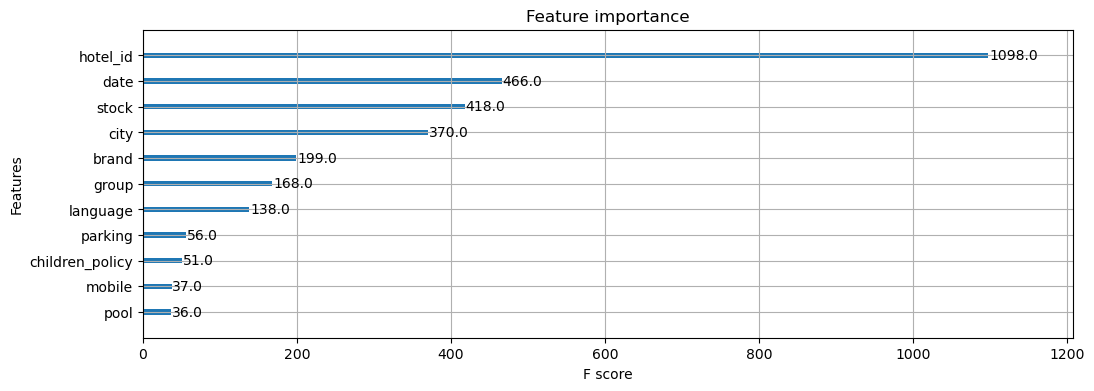

In [146]:

classifier = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
classifier.fit(X, y)
fig, ax = plt.subplots(figsize=(12,4))
plot_importance(classifier, ax=ax)
plt.show()

In [149]:
data_train=data_train.drop(['hotel_id'],axis=1)
data_test=data_test.drop(['hotel_id'],axis=1)

In [150]:


# select only the numerical features
X_test  = data_test.select_dtypes(include=['number']).copy()
X_train = data_train.select_dtypes(include=['number']).copy()


# add the train/test labels
X_train["TARGET"] = 0
X_test["TARGET"]  = 1

# make one big dataset
all_data = pd.concat([X_train, X_test], axis=0, ignore_index=True)

# shuffle
all_data_shuffled = all_data.sample(frac=1)

# create our DMatrix (the XGBoost data structure)
X = all_data_shuffled.drop(['TARGET'], axis=1)
y = all_data_shuffled['TARGET']
XGBdata = xgb.DMatrix(data=X,label=y)

# our XGBoost parameters
params = {"objective":"binary:logistic",
          "eval_metric":"logloss",
          'learning_rate': 0.05,
          'max_depth': 5, }

# perform cross validation with XGBoost
cross_val_results = cv(dtrain=XGBdata, params=params, 
                       nfold=5, metrics="auc", 
                       num_boost_round=200,early_stopping_rounds=20,
                       as_pandas=True)

# print out the final result
print((cross_val_results["test-auc-mean"]).tail(1))

199    0.953972
Name: test-auc-mean, dtype: float64


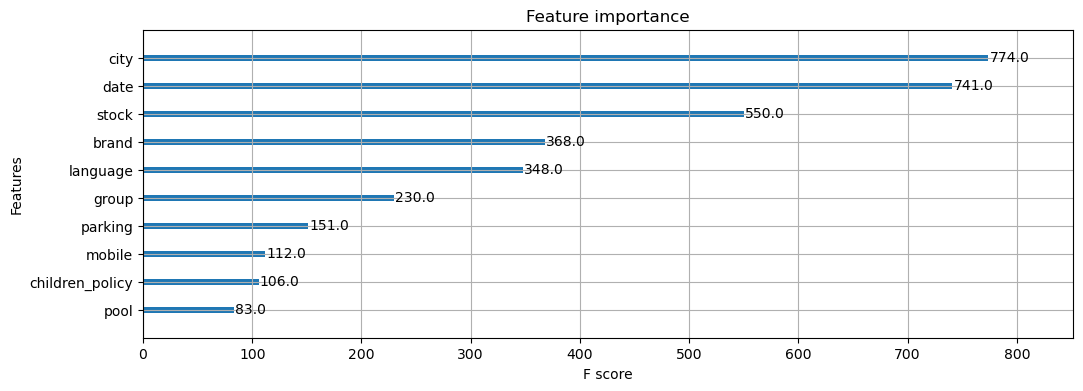

In [151]:
classifier = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
classifier.fit(X, y)
fig, ax = plt.subplots(figsize=(12,4))
plot_importance(classifier, ax=ax)
plt.show()

In [52]:
train = data_train
test = data_test

train['is_test'] = 0
test['is_test'] = 1

orig_train = train.copy()

train = pd.concat(( orig_train, test ))
train.reset_index( inplace = True, drop = True )

x = train.drop( [ 'is_test' ], axis = 1 )
y = train.is_test


In [53]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5678)

n_estimators = 100
clf = RF( n_estimators = n_estimators, n_jobs = -1 )

predictions = np.zeros( y.shape )



In [55]:
for f, ( train_i, test_i ) in enumerate( skf.split(x, y) ):

    print("# fold {}, {}".format( f + 1, ctime()))

    x_train = x.iloc[train_i]
    x_test = x.iloc[test_i]
    y_train = y.iloc[train_i]
    y_test = y.iloc[test_i]
    
    clf.fit( x_train, y_train )

    p = clf.predict_proba( x_test )[:,1]
    
    auc = AUC( y_test, p )

    predictions[ test_i ] = p




# fold 1, Thu Jan  5 14:07:06 2023
# fold 2, Thu Jan  5 14:07:18 2023
# fold 3, Thu Jan  5 14:07:32 2023
# fold 4, Thu Jan  5 14:07:45 2023
# fold 5, Thu Jan  5 14:07:58 2023


In [56]:
train['p'] = predictions
i = predictions.argsort()
train_sorted = train.iloc[i]


train_sorted = train_sorted.loc[ train_sorted.is_test == 0 ]
assert( train_sorted.is_test.sum() == orig_train.is_test.sum())

In [236]:
# train_sorted.to_csv('./Datatrain/train_sorted.csv')

In [58]:
train_sorted_bis=train_sorted[train_sorted.p != 0.0]

In [60]:
train_sorted_bis.to_csv('./Datatrain/train_sorted_bis.csv')

## Prediction du log_price avec Random Forest

In [174]:
data_train=pd.read_csv('./Datatrain/data_train_final.csv')
data_train=data_train.drop(['Unnamed: 0'],axis=1)

In [175]:
train_sorted_bis=pd.read_csv('./Datatrain/train_sorted_bis.csv')

In [177]:
data_train["log_price"]=data_train["price"].map(lambda x : log(x))
data_train.head()

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,0,639,149,110,valletta,35,greek,1,155054,1.0,Yin Yang,Royal Lotus,0,1,0,5.003946
1,1,376,159,115,valletta,35,greek,1,155054,1.0,Accar Hotels,Marcure,0,0,0,5.068904
2,2,985,68,70,valletta,35,greek,1,155054,1.0,Independant,Independant,1,0,0,4.219508
3,3,377,127,84,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,4,200,130,80,valletta,35,greek,1,155054,1.0,Boss Western,J.Halliday Inn,0,0,0,4.867534


In [178]:
list_avatar_train=data_train['avatar_id'].unique()

In [179]:
data_train['index_request']=0

In [180]:
for avatar in list_avatar_train : 
    test1=data_train[data_train['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_train[data_train['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_train[data_train['avatar_id']==avatar]=test1

In [181]:
data_train

,index,hotel_id,price,stock,city,date,language,mobile,avatar_id,index_request,group,brand,parking,pool,children_policy,log_price
0,0,639,149,110,valletta,35,greek,1,155054,1,Yin Yang,Royal Lotus,0,1,0,5.003946
1,1,376,159,115,valletta,35,greek,1,155054,1,Accar Hotels,Marcure,0,0,0,5.068904
2,2,985,68,70,valletta,35,greek,1,155054,1,Independant,Independant,1,0,0,4.219508
3,3,377,127,84,valletta,35,greek,1,155054,1,Boss Western,J.Halliday Inn,1,0,0,4.844187
4,4,200,130,80,valletta,35,greek,1,155054,1,Boss Western,J.Halliday Inn,0,0,0,4.867534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351748,291402,620,170,12,vilnius,15,swedish,1,146515,3,Chillton Worldwide,Quadrupletree,0,1,0,5.135798
351749,291403,605,182,15,vilnius,15,swedish,1,146515,3,Yin Yang,Royal Lotus,1,0,0,5.204007
351750,291404,516,264,23,vilnius,15,swedish,1,146515,3,Morriott International,Corlton,1,0,2,5.575949
351751,291405,490,144,13,vilnius,15,swedish,1,146515,3,Yin Yang,Ardisson,1,0,0,4.969813


In [182]:
data_test= pd.read_csv('test_set.csv')
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [183]:
list_avatar_test=data_test['avatar_id'].unique()

In [184]:
data_test['index_request']=0

In [185]:
for avatar in list_avatar_test : 
    test1=data_test[data_test['avatar_id'] ==avatar].copy()
    list_date=test1['date'].unique()
    
    if len(list_date)==1 : 
        ech=test1[test1['date'] ==list_date[0]].copy()
        ech['index_request']=1
        data_test[data_test['avatar_id']==avatar]=ech
        
    else : 
        for i in range(len(list_date)) : 
            ech=test1[test1['date'] ==list_date[i]].copy()
            ech['index_request']=i+1
            test1[test1['date'] ==list_date[i]]=ech
        data_test[data_test['avatar_id']==avatar]=test1

In [186]:
hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
data_test = data_test.join(hotels, on=['hotel_id', 'city'])
data_test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,index_request,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,1,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,1,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,1,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,1,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,1,Accar Hotels,Safitel,1,1,1


In [187]:
# this function is by Max Halford at the address noted above
def calc_smooth_mean(df, by, on, m, target_df):
    '''Function returns a weighted mean value for the each member of a column.
    Arguments:
    df: The df being used to calculate the means
    by: the column being target encoded
    on: the thing to be encoded; almost always price in this circumstance
    m: weight before moving toward global mean; usually a min # samples
    target_df: the target df for the mean encoding. Could be same as df or different.'''
    # Compute the global mean
    mean = df[on].mean() 

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])  
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return target_df[by].map(smooth)
    #return round(target_df[by].map(smooth), 0) 

In [188]:
# get size of training data
num_of_samples = data_train.shape[0]

# determining minimum number of samples for zip and month to use their
# own mean rather than expanding into the full data set mean 
city_samples = num_of_samples/data_train['city'].unique().shape[0]
group_samples = num_of_samples/data_train['group'].unique().shape[0]
brand_samples = num_of_samples/data_train['brand'].unique().shape[0]
language_samples = num_of_samples/data_train['language'].unique().shape[0]

In [189]:
data_test['city'] = calc_smooth_mean(data_train, by='city', on='price', m=city_samples,target_df=data_test)
data_test['group'] = calc_smooth_mean(data_train, by='group', on='price', m=group_samples,target_df=data_test)
data_test['brand'] = calc_smooth_mean(data_train, by='brand', on='price', m=brand_samples,target_df=data_test)
data_test['language'] = calc_smooth_mean(data_train, by='language', on='price', m=language_samples,target_df=data_test)

In [190]:
data_train['city'] = calc_smooth_mean(data_train, by='city', on='price', m=city_samples,target_df=data_train)
data_train['group'] = calc_smooth_mean(data_train, by='group', on='price', m=group_samples,target_df=data_train)
data_train['brand'] = calc_smooth_mean(data_train, by='brand', on='price', m=brand_samples,target_df=data_train)
data_train['language'] = calc_smooth_mean(data_train, by='language', on='price', m=language_samples,target_df=data_train)

In [194]:
import pickle

with open("dict_city_encoding.pkl", "wb") as tf:
    pickle.dump(city_encoding,tf)
    
with open("dict_group_encoding.pkl", "wb") as tf:
    pickle.dump(group_encoding,tf)
    
with open("dict_brand_encoding.pkl", "wb") as tf:
    pickle.dump(brand_encoding,tf)
    
with open("dict_language_encoding.pkl", "wb") as tf:
    pickle.dump(language_encoding,tf)

In [191]:
data_test=data_test.drop(['index'],axis=1)
data_train=data_train.drop(['index'],axis=1)
data_train=data_train.drop(['avatar_id'],axis=1)
data_test=data_test.drop(['avatar_id'],axis=1)
data_train=data_train.drop(['price'],axis=1)
data_test=data_test.drop(['order_requests'],axis=1)
data_train=data_train.drop(['index_request'],axis=1)
data_test=data_test.drop(['index_request'],axis=1)

In [187]:
# data_test=data_test.drop(['hotel_id'],axis=1)
# data_train=data_train.drop(['hotel_id'],axis=1)

In [192]:
cols=['city','date','language','mobile','hotel_id','stock','group','brand','parking','pool','children_policy','log_price']

In [193]:
data_train=data_train[cols]

In [194]:
data_train=data_train.iloc[train_sorted_bis.index]

In [195]:
logprice=data_train['log_price']
X_train, X_test, Y_train, Y_test = train_test_split(data_train,logprice,test_size=0.25,random_state=11)
X_train=X_train.drop(['log_price'],axis=1)

In [196]:
param=[{"max_features":list(range(2,10))}]
regrf= GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)
regrfOpt=regrf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (regrfOpt.best_score_,regrfOpt.best_params_))



Meilleur score = 0.993427, Meilleur paramètre = {'max_features': 9}


In [197]:
Ypred_regrf = regrfOpt.predict(data_test)

In [69]:
import pickle


# If you've fitted the model just type this to save it: Remember to change the file name
with open("regrfOpt_model.pkl", "wb") as f:
    pickle.dump(regrfOpt, f)  
    
with open("regrfOpt_model.pkl", "rb") as f:
    regrfOpt = pickle.load(f)

In [198]:
d_test= pd.read_csv('test_set.csv')
submission=pd.DataFrame()
submission['index']=d_test['index']
submission['price']=np.exp(Ypred_regrf)

In [199]:
submission.head()

,index,price
0,0,110.447783
1,1,142.317370
2,2,56.164635
3,3,58.483885
4,4,196.778987


In [109]:
submission.to_csv('submission.csv', index=False)